In [1]:
import numpy as np

##################################################
##### Matplotlib boilerplate for consistency #####
##################################################
from ipywidgets import interact
from ipywidgets import FloatSlider
from matplotlib import pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

global_fig_width = 10
global_fig_height = global_fig_width / 1.61803399
font_size = 14

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.edgecolor'] = '0.8'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelpad'] = 8
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 16.0
plt.rcParams['axes.titlesize'] = font_size * 1.4
plt.rcParams['figure.figsize'] = (global_fig_width, global_fig_height)
plt.rcParams['font.sans-serif'] = ['Computer Modern Sans Serif', 'DejaVu Sans', 'sans-serif']
plt.rcParams['font.size'] = font_size
plt.rcParams['grid.color'] = '0.8'
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams['lines.dash_capstyle'] = 'round'
plt.rcParams['lines.dashed_pattern'] = [1, 4]
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['xtick.major.pad'] = 4
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.labelsize'] = font_size
plt.rcParams['ytick.major.pad'] = 4
plt.rcParams['ytick.major.size'] = 0
##################################################

# Lecture 1: Bayesian Inference and PINTS

by Martin Robinson


- Oxford Research Software Engineering group (http://www.cs.ox.ac.uk/projects/RSE)
- Department of Computer Science, University of Oxford


![](fig/about_me.svg)

- PhD in Mathematical Science at Monash University
- Postdoc at the University of Twente, Netherlands
- Currently:
   - Senior Research Software Engineer in the [Oxford RSE group](http://www.cs.ox.ac.uk/projects/RSE)
   - Co-director of EPSRC & MRC [Sustainable Approaches to Biomedical Science Centre for Doctoral Training: Responsible and Reproducible Research](https://sabsr3.web.ox.ac.uk), or SABS:R3 
  

## Research Interests include:

- numerical modelling and simulation
- particle-based methods
- Bayesian inference
- developing robust and reliable software for research
     - [Aboria](https://github.com/aboria/Aboria) (C++ library for particle-based modelling methods)
     - [Chaste](https://chaste.cs.ox.ac.uk) (C++ library for electrophysiology and discrete cellular modelling) 
     - [PINTS](https://github.com/pints-team/pints) (Python library for Parameter Inference for Time-Series Models)
     - [Smoldyn](http://www.smoldyn.org/) (computer program for cell-scale biochemical simulations)
     - [SPH-DEM](https://github.com/martinjrobins/SPH-DEM) (C++ library for coupled Smoothed Particle Hydrodynamics and Discrete Elements Modelling)
     - [PyBaMM](https://github.com/tinosulzer/PyBaMM/tree/master/pybamm) (Python library for modelling batteries)
     - [Trase](https://github.com/trase-cpp/trase) (C++ animated plotting library)
    

# Course Structure

- **Lecture 1: Introduction to Bayesian Inference and Pints**
   - **What is Bayesian Inference?**
   - **Bayes Theorem: Priors, Likelihood functions and Posteriors**
   - **Introduction to PINTS**
   - **Using your own models in PINTS**
- Lecture 2: Maximum Likelihood Estimation
- Lecture 3: MCMC sampling
- Lecture 4: Hierarchical models

### Target audience:

- Researchers who want to apply statistical inference in their work.
- toy models used to illustrate concepts, but with an emphisis on *time-series* models

### Prerequisites:

- A basic knowledge of mathematical programming in Python, or similar.
- some basic statistics (probability distributions - continuous & discrete) and calculus 

## Slides

- Lecture slides written as a Jupyter notebook (https://jupyter.org/)
- Converted to slides using the RISE plugin (https://github.com/damianavila/RISE)
- *Almost all* plots in these lectures generated using Python code embedded in the notebook
- Some example code is shown in the slides, for the rest you can look in the notebook
   - Get all material here: https://github.com/pints-team/electrochemistry_course
   - Need to install PINTs to execute the notebooks, instructions here: https://github.com/pints-team/pints

# Acknowledgements

- Most of the material for this course was taken from the textbook and lecture series by Dr Ben Lambert
   - *Lambert, B. (2018). A Student’s Guide to Bayesian Statistics. Sage.* 
   - [https://ben-lambert.com](https://ben-lambert.com)
   - Ben Lambert is also a fellow [PINTS](https://github.com/pints-team/pints) developer

![](fig/lambert_book.jpg)



# A conceptual introduction to inference

### The Big world
1. Consider an observable characteristic we are trying to
explain, for example the heights of 5 randomly chosen
individuals.
2. Assume that there exists a true process $T$ that generates
the heights of all individuals in our sample.
3. There is variability in the observables outputted by $T$; this
can due to the inherent
variability or because we lack knowledge
of the genetics and environmental factors that affect
growth.
4. Imagine a set of all conceivable processes that could result
in our sample of height observations, which we call the
“Big World”.

<center>
    
![](fig/big_world.svg)
</center>

*Images adapted from “A Technical Introduction to Probability and
Bayesian Inference for Stan Users”, Stan Development Team, 2016.*

## What is inference?

- **Motivation:** update our knowledge of $T$ in light of data,
and use the updated knowledge to estimate quantities of
interest.
  - In our height example we might want to estimate the
mean height of the entire population having witnessed our
sample of 5 individuals.

### Method:
1. Find areas of the Big World that are closest to $T$; ideally
we would find $T$ itself!
2. Estimate quantities of interest using these subsets of the
*Small World*.

## The Small World

1. The infinity of the Big World is too large to be useful.
2. Instead we first consider a subset of possible data
generating processes which we call the “Small World”, or
$\Omega$.
3. The Small World corresponds to a single probability model
framework; in our height example we might suppose that
$H \sim  N(\mu, \sigma)$, where $\mu$ is the mean height, and $\sigma$ is their
standard deviation.
4. By varying our parameters $\theta = (\mu, \sigma)$ we get different data
generating processes.
5. The collection of probability distributions we get by varying
$\theta \in \Omega$ in the Small World is known as the *Likelihood*.

<center>
    
![](fig/small_world.svg)
</center>

*An unlikely Small World*


<center>
    
![](fig/small_world2.svg)
</center>

*A Boxian Small World: “All models are wrong but some are useful” (George Box, 1976)*


## The Prior

1. The Small World is still too big for our purposes.
2. We usually have some knowledge about which areas of the
Small World are nearest to $T$. For example we don’t
believe that $\mu = 100$m and $\mu = 1.5$m are equally probable.
3. As such, in *Bayesian* inference we define a prior probability
density that gives a weighting to all $\theta \in \Omega$ reflecting our
beliefs.
4. *Frequentist* inference does not require us to specify a prior

<center>
    
![](fig/the_prior.svg)
*A Gaussian prior for $\Omega$*
</center>



## The data

1. Inference is the process of updating our prior knowledge in
light of data.
2. In Bayesian inference with a likelihood and our prior
knowledge explicitly stated we use *Bayes’ rule* to find our
posterior probability density over $\theta \in \Omega$.



<center>
    
![](fig/posterior.svg)
</center>

## Summary of the inference process

1. Define the observables: The Big World
2. Specify a likelihood (Small World)
3. Specify a prior
4. Input the data, calculate the posterior

# Tangible benefits of Bayesian inference

- Straightforward application to scientific modelling and experimentatal data analysis
- Simple and intuitive model building (unlike frequentist statistics there is no need to remember lots of specific formulae).
- Exhaustive and creative model testing.
- Straightforward interpretation of results.


## Frequentist and Bayesian world views

The two paradigms differ in their definition of probability:

**Frequentist:** $\;P(A)\;$ describes the limiting frequency of an event $A$. 
 - there is a fixed value of $\;P(A)\;$ that must be calculated 
   - e.g. proportion of heads from a fair coin toss will approach 0.5 after a large number of trials. 
 - Does not make sense to “update” probabilities.

**Bayesian:** $\;P(A)\;$ is a measure of centainty, quantification of investigators belief that $\;A\;$ is true. 
 - A fixed value of $\;P(A)\;$ is not neccessary, nor desirable. 
 - Prior information must be used to augment sample data
 - $\rightarrow$ free to update our beliefs using *Bayes’ rule*!

## Bayes' Rule

- Inference involves finding parameter values, or distributions of parameters values, for which model outputs are consistent with observations

- Bayesian inference uses Bayes' rule to update prior beliefs after obtaining new data $y$

```
                     Bayes' Rule
likelihood + prior -------------------> posterior
```

 - **Likelihood function:** the probability of obtaining the data $y$, given a set of parameters $\theta$
 - **Prior probability distribution:** encodes your uncertainty in the parameters before the data $y$ has been obtained
 - **Posterior distribution:** updated probability distribution of $\theta$, given the new data $y$


## Bayes' Rule:

<center>
<figure> 
    <img src="fig/bayes_rule.svg"> 
    <figcaption><i>An Essay towards solving a Problem in the Doctrine of Chances (1763)</i>
    </figcaption> 
</figure>
</center>

![Thomas Bayes](fig/225px-Thomas_Bayes.gif)
*Reverend Thomas Bayes (1701?–1761)*


# Likelihoods

$$P(\theta | data) = \frac{\color{red}{{P(data|\theta)}} P(\theta)}{P(data)}$$

- common to both Frequentist and Bayesian analyses
- probability of generating the particular sample of data, given the model parameters $\theta$
- normally easy to obtain, *given a good statistical model*
- often only interested in the *most likely* parameters (Maximum Likelihood Estimation, see Lecture 2)
- **The aim of inference:** inverting the likelihood
 - Both Frequentists and Bayesians essentially invert:
 
$$P(data|\theta) \rightarrow P(\theta | data).$$

 - This amounts to going from an ’effect’ back to a ’cause’.

# Example: flipping a coin

![](fig/coin.jpeg)

Take the classic example of tossing a fair coin that has a probability landing heads up of $\theta = 0.5$

If we flip the coin 2 times, we have the set of possible outcomes:

$$P(H, H | \theta = 0.5) = P(H|\theta=0.5) P(H|\theta=0.5) = 0.25$$
$$P(H, T | \theta = 0.5) = P(H|\theta=0.5) P(T|\theta=0.5) = 0.25$$
$$P(T, H | \theta = 0.5) = P(T|\theta=0.5) P(H|\theta=0.5) = 0.25$$
$$P(T, T | \theta = 0.5) = P(T|\theta=0.5) P(T|\theta=0.5) = 0.25$$

This is a valid probability distribution:

$$ P(H, H | \theta = 0.5) + P(H, T | \theta = 0.5) + P(T, H | \theta = 0.5)+ P(T, T | \theta = 0.5) = 1.0$$

# Calculating the likelihood

- Hold the **data constant**, and find the likelihood of this data given a certain $\theta$
- Provides an infinite number of possibilities to arrive at the given data
- Take for example the case of $\text{data} = H, H$
- The likelihood function is given by $P(data|\theta) = \theta^2$ 




In [2]:
def show_coin_likelihood_hh():
    theta = np.linspace(0,1,100)
    likelihood = theta*theta
    plt.plot(theta,likelihood)
    plt.xlabel(r'$\theta$')
    plt.ylabel('likelihood')
    plt.fill_between(theta,likelihood,alpha=0.2)
    plt.show()
    return likelihood,theta

def show_coin_likelihood_ht():
    theta = np.linspace(0,1,100)
    likelihood = theta*(1-theta)
    plt.plot(theta,likelihood)
    plt.xlabel(r'$\theta$')
    plt.ylabel('likelihood')
    plt.fill_between(theta,likelihood,alpha=0.2)
    plt.show()
    return likelihood,theta

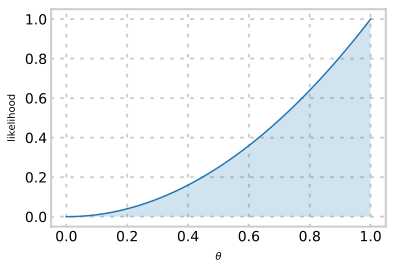

In [3]:
likelihood,theta = show_coin_likelihood_hh()

This is **not** a valid probability distribution

In [4]:
print('integral under the likelihood = ',np.trapz(likelihood,x=theta))

integral under the likelihood =  0.33335033840084355


## Different data this time

- Take for example the case of $\text{data} = H, T$
- The likelihood function is given by $P(data|\theta) = \theta (1 - \theta)$ 

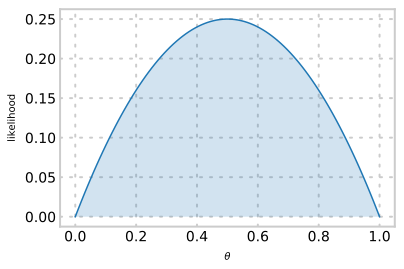

In [5]:
likelihood,theta = show_coin_likelihood_ht()

# Priors

$$P(\theta | data) = \frac{{P(data|\theta)} \color{red}{P(\theta)}}{P(data)}$$

- This is particular to Bayesian inference, where we always update our *prior* beliefs using the new data
- This is a function of all the possible parameter values $\theta$

# Example Prior

Back to the coin example, we know that the possible domain for our parameter is $\theta \in [0, 1]$.
1. One option is the consider all the possible values of $\theta$ to be equally likely (i.e. a Uniform prior).
2. Another is to use our previous knowledge that most coins are likely to be fair (i.e. a Gaussian prior around $\theta = 0.5$)

In [6]:
import numpy as np
import scipy
import scipy.stats
import math

def show_priors():
    x = np.linspace(0, 1, 100)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8/1.618))
    ax1.plot(x,scipy.stats.uniform.pdf(x, loc=0, scale=1), label='Uniform prior')
    ax1.fill_between(x,scipy.stats.uniform.pdf(x, loc=0, scale=1),alpha=0.2)

    ax2.plot(x,scipy.stats.norm.pdf(x, 0.5, 0.1), label='Gaussian prior')
    ax2.fill_between(x,scipy.stats.norm.pdf(x, 0.5, 0.1),alpha=0.2)

    ax1.set_xlabel(r'$\theta$')
    ax1.set_ylabel('probability density')
    ax2.set_xlabel(r'$\theta$')
    ax2.set_ylabel('probability density')

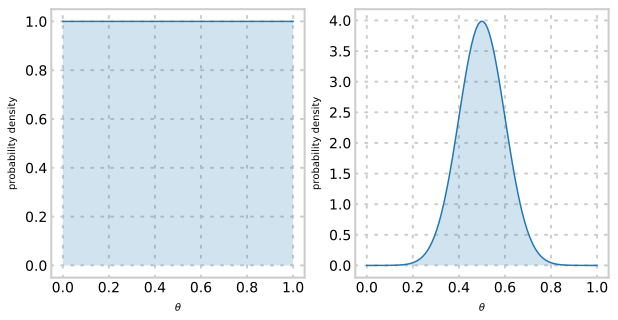

In [7]:
show_priors()

# The devil's in the denominator

$$P(\theta | data) = \frac{P(data|\theta) P(\theta)}{\color{red}{P(data)}}$$

- represents the probability of obtaining our particular sample of data, given a particular model (i.e. likelihood) and prior
- **normalises** the posterior so the area under the probability distribution is 1

\begin{align*}
P(data) &= \int_{all \theta} P(data, \theta) d\theta \\
        &= \int_{all \theta} P(data|\theta) P(\theta) d\theta
\end{align*}



## Calculating the denominator in 1 dimension

- For our coin example there is a single parameter $\theta \rightarrow P(H,H |\theta) = \theta^2$. 
- For this example we will use the Uniform prior

$$
P(H,H) = \int_0^1 P(H,H |\theta) P(\theta) d \theta= \int_0^1 \theta^2 d \theta = \frac{1}{3} \theta^3
$$

This is equivalent to working out an area under a curve.

## Calculating the denominator in 2 dimension

If we considered a different model where there were two
parameters $\theta_1 \in (0, 1), \theta_2 \in (0, 1) \rightarrow$:

$$
P(data) = \int_0^1 \int_0^1 P(data |\theta) P(\theta) d \theta_1 d \theta_2
$$

This is equivalent to working out a **volume** contained within a surface. 

## Calculating the denominator in d dimensions

If we considered a different model where there were $d$
parameters ($\theta_1, \theta_2, ..., \theta_d) \in (0, 1) \rightarrow$:

$$
P(data) = \int_0^1 ... \int_0^1 P(data |\theta) P(\theta) d \theta_1 ... d \theta_d
$$

This is equivalent to working out a ($d$ + 1)-dimensional **volume** contained within a $d$-dimensional (hyper-surface)! 

<center>
<img src="fig/I_have_no_idea_dog.jpeg"> 
</center>


## The difficult denominator

- Calculating the denominator possible for $d < 10$ using computers.
- Numerical quadrature and many other approximate schemes struggle for larger $d$.
- Many models have thousands of parameters.

Arrrghhh!

### Solutions:

- **Non-linear optimisation methods**: find the maximum of the posterior, either ignoring the rest of the posterior distribution or making a Gaussian assumption around the maximum point (Lecture 2)

- **Sampling:** understand a distribution by sampling from it, rather than exact calculation (Lecture 3).

- **Conjugate priors:** use certain pairs of distributions where we can follow basic rules to find posteriors, no calculation necessary! (Lecture 4)

# Posteriors: the goal of Bayesian inference

$$\color{red}{P(\theta | data)} = \frac{P(data|\theta) P(\theta)}{P(data)}$$

**For example:**

![](fig/coin.jpeg)

- How likely is our coin to be biased?
- We perform an experiment of 10 flips, and it lands heads up 7 times
- We will use the Uniform prior given earlier
- Likelihood is:

$$P(7\times H | \theta) = \theta^7 (1-\theta)^3$$



- Lets run a number of different experiments, each using a different number of flips $f$, giving a different random number of heads $h$

In [8]:
# experiment - f coin flips
def run_coin_experiment(f):
    theta = np.linspace(0, 1, 1000)
    h = np.random.poisson(f/2)
    
    # Uniform prior
    prior = np.ones(len(theta))
    
    # Likelihood function
    likelihood = theta**h * (1-theta)**(f-h)
    
    # Normalising factor (numerical integration)
    denominator = np.trapz(likelihood*prior, x=theta)
    
    # Bayes rule
    posterior = likelihood * prior / denominator
    
    plt.plot(theta,posterior, label='h = %s'%str(h))
    plt.fill_between(theta,posterior,alpha=0.2)
    plt.xlabel(r'$\theta$')
    plt.ylabel('posterior')
    plt.title('area under posterior is %f'%np.trapz(posterior, x=theta))
    plt.legend()
    

In [9]:
f_widget = FloatSlider(value=7.0, min=1.0, max=200.0, step=1.0, continuous_update=False)

In [10]:

interact(run_coin_experiment, f=f_widget, continuous_update=False);

interactive(children=(FloatSlider(value=7.0, continuous_update=False, description='f', max=200.0, min=1.0, ste…

## Summary

- All methods of inference involve the subjective decision of defining the boundaries of the Small World (**likelihood**).
- Likelihood determined by a combination of the *statistical model* **and** the *data*
- Small World inference involves *inversion of the likelihood*.
- Bayesians use **Bayes’ rule**, which requires us to specify a **prior**.

# Probabilistic Inference on Noisy Time Series (PINTS)

- **Authors:** Michael Clerx, Martin Robinson, Ben Lambert, Chon Lok Lei, Sanmitra Ghosh, Gary R. Mirams, David J. Gavaghan
- An **open-source** (BSD 3-clause license) **Python** library that provides researchers with a broad suite of non-linear optimisation and sampling methods
- Uses a **Bayesian framework**: Many different Priors, Likelihood functions, MCMC samplers and non-linear optimisers available
- Use your *own pre-build model* for inference: users wrap their model and data in a transparent and straightforward interface
- Pre-print available on [arXiv](https://arxiv.org/abs/1812.07388)


# Implementation and architecture

PINTS is designed around two core ideas: 

1. PINTS should work with a wide range of time series models, and make no demands on how they are implemented other than a minimal input/output interface. 
2. It is assumed that model evaluation (simulation) is the most costly step in any optimisation or sampling routine.

![Class Hierarchy](fig/class-hierarchy-eps-converted-to.svg)

# Writing a model

- Pints is intended to work with a wide range of models, and assumes as little as possible about the model's form.
- a "model" in Pints is anything that implements the `ForwardModel` interface:
    - take a parameter vector $(\boldsymbol{\theta})$ and a sequence of times $(\mathbf{t})$ as an input, 
    - and then return a vector of simulated values $(\mathbf{y})$:

$$f(\boldsymbol{\theta}, \mathbf{t}) \rightarrow \mathbf{y}$$

# Example Model

In the example below, we define a system of ODEs (modelling a simple chemical reaction) and use SciPy to solve it. We then wrap everything in a `pints.ForwardModel class`, and use a Pints optimisation to find the best matching parameters.

In this example we'll use a model of a reversible chemical reaction:

$$\dot{y}(t) = k_1 (1 - y) - k_2 y,$$

where $k_1$ represents a forward reaction rate, $k_2$ is the backward reaction rate, and $y$ represents the concentration of a chemical solute.

The next slide shows how you would implement this model using the standard Python package SciPy

In [11]:
import numpy as np
from scipy.integrate import odeint

# Define the right-hand side of a system of ODEs
def r(y, t, p):
    k1 = p[0] # Forward reaction rate
    k2 = p[1] # Backward reaction rate
    dydt = k1 * (1 - y) - k2 * y
    return dydt

# Run an example simulation
p = [5, 3]    # parameters
y0 = 0.1      # initial conditions

# Call odeint, with the parameters wrapped in a tuple
times = np.linspace(0, 1, 1000)
values = odeint(r, y0, times, (p,))

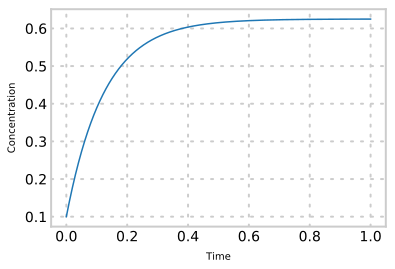

In [12]:
# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)
plt.show()

# Writing a wrapper class for Pints

Now we'll wrap the model in a class that extends `pints.ForwardModel`.

It should have two methods:
  - `simulate()`: Run a simulation with the given parameters for the given times and return the simulated values
  - `n_parameters()`: Return the dimension of the parameter vector

In [13]:
import pints

class ExampleModel(pints.ForwardModel):
    
    def simulate(self, parameters, times):
        y0 = 0.1
        def r(y, t, p):
            dydt = (1 - y) * p[0] - y * p[1]
            return dydt
        return odeint(r, y0, times, (parameters,)).reshape(times.shape)
    
    def n_parameters(self):
        return 2

# Then create an instance of our new model class
model = ExampleModel()

# Run the same simulation using our new model wrapper
values = model.simulate([5, 3], times)

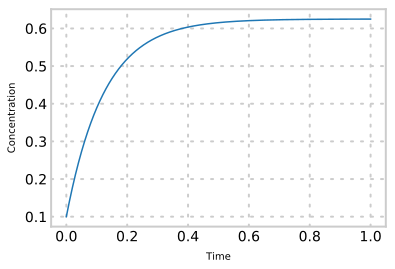

In [14]:
# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)
plt.show()

# Running an optimisation problem

Now that our model implements the `pints.ForwardModel` interface, we can use it with Pints tools such as optimisers or MCMC.

First, we use the model to generate test data by adding some generated noise

In [15]:
# Define the 'true' parameters
true_parameters = [5, 3]

# Run a simulation to get test data
values = model.simulate(true_parameters, times)

# Add some noise
values += np.random.normal(0, 0.02, values.shape)

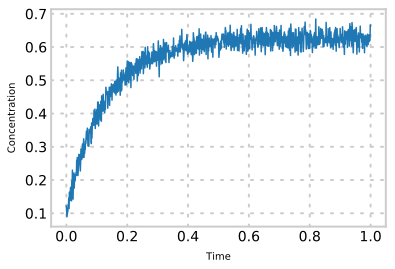

In [16]:
# Show the test data
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values)
plt.show()

# Error function

We then define a score function that characterises the mismatch between model predictions and data. 

We will use the classic sum of squares error for this (This is related to maximising a Bayesian Likelihood function with indepedent Gaussian Noise, see next Lecture). 

$$\sum_{i=0}^N (f(\boldsymbol{\theta}, t_i) - f^d_i)^2$$

where $\mathbf{f}^d$ is the vector of test data. We can tell Pints about the the test data $\mathbf{f}^d$ by wrapping it and the model $f(\boldsymbol{\theta}, \mathbf{t})$ in a `pints.SingleOutputProblem` object 

 


We then use the SNES optimiser to estimate the model parameters from the data.

In [17]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0.1, 0.1], [10, 10])

# Select a starting point
x0 = [1, 1]

# Perform an optimization using SNES. 
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries, method=pints.SNES)
print('Score at true solution:')
print(score(true_parameters))

Minimising error measure
using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      18.50209   0:00.0
1     12     12.05861   0:00.0
2     18     5.356118   0:00.0
3     24     3.722737   0:00.0
20    126    0.403      0:00.1
40    246    0.403      0:00.1
60    366    0.402      0:00.2
80    486    0.402      0:00.3
100   606    0.402      0:00.4
120   726    0.402      0:00.5
140   846    0.402      0:00.5
160   966    0.402      0:00.6
180   1086   0.402      0:00.6
200   1206   0.402      0:00.7
220   1326   0.402      0:00.8
240   1446   0.402      0:00.8
260   1566   0.402      0:00.9
280   1686   0.402      0:01.0
300   1806   0.402      0:01.0
320   1926   0.402      0:01.1
340   2046   0.402      0:01.2
360   2166   0.402      0:01.2
380   2286   0.402      0:01.3
385   2310   0.402      0:01.3
Halting: No significant change for 200 iterations.
Score at true solution:
0.4024944688284413


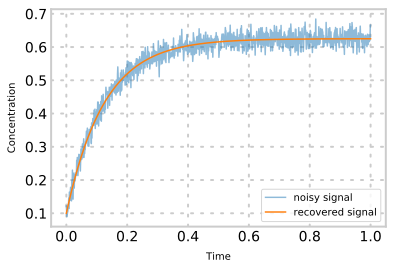

In [18]:
# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.plot(times, values, alpha=0.5, label='noisy signal')
plt.plot(times, problem.evaluate(found_parameters), label='recovered signal')
plt.legend()
plt.show()

## Summary

- If you have a time-series model that can be wrapped in a python function, you can start using **PINTS**
- Future lectures illustrate using PINTS for:
    - *Maximum Likelihood* and *Maximum a Postiori Estimation* (Lecture 2)
    - *Markov Chain Monte Carlo* sampling (Lecture 3) and 
    - *Hierarchical models* (Lecture 4)
- I will be at Monash for the next 2 weeks. *Very happy* to help if you need help getting PINTS working with your own models!
